In [59]:
import xlwings as xw 
import os 
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline

In [4]:
os.chdir(r'E:\研二数据分析工具')
os.getcwd()

'E:\\研二数据分析工具'

In [10]:
df=pd.read_excel("数据.xlsx",sheet_name="数据")
df

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,will
0,1,2,753.04,87.65,81.56,85.61,85.63,85.81,82.35,84.77,...,6,14,2,3,19.0,11,10,30,5,0
1,2,3,88.92,82.95,85.17,85.19,77.76,83.60,82.15,88.87,...,6,5,4,4,18.0,10,8,0,30,0
2,3,3,95.05,93.33,77.66,93.03,88.87,94.17,95.60,95.88,...,4,9,5,2,24.0,10,17,0,0,0
3,4,3,71.15,76.79,66.69,81.93,66.65,77.77,77.58,76.99,...,6,10,4,7,27.0,10,10,18,25,0
4,5,3,70.57,71.65,70.44,74.03,66.65,66.34,62.09,74.44,...,6,13,4,2,25.0,15,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,1960,2,71.36,75.37,70.44,77.77,68.43,75.03,75.48,70.33,...,5,6,3,5,25.0,11,20,0,0,0
1960,1961,2,99.04,99.03,99.03,99.98,99.98,99.99,99.99,99.98,...,5,14,7,9,29.0,9,9,30,20,0
1961,1962,2,90.77,91.92,92.67,96.72,94.96,97.25,95.60,95.88,...,6,8,4,5,39.0,20,17,0,30,0
1962,1963,2,82.43,88.51,74.05,93.03,76.46,94.70,91.16,95.88,...,6,8,4,4,21.0,12,7,20,20,0


In [11]:
def delta_tiqu(da):
    lis1=[]
    lis2=[]
    lis3=[]
    for i in range(2,da.shape[1]):
        lis1.append(np.mean(da.iloc[:,i])-3*np.std(da.iloc[:,i]))
        lis2.append(np.mean(da.iloc[:,i])+3*np.std(da.iloc[:,i]))
        lis3.append(list(da.columns)[i])
        #将数据框进行整合
    #先将列表变成数据框
    li1=pd.DataFrame(lis1)
    li2=pd.DataFrame(lis2)
    li3=pd.DataFrame(lis3)
    df1=pd.concat([li3,li1,li2],axis=1)
    df1.columns=["名称","下限","上限"]
    return df1

In [12]:
#得到数据框的行数

#得到数据框的列数

#将每列的分位数提取出来
def fenwei_tiqu(da):
    lis1=[]
    lis2=[]
    lis3=[]
    for i in range(da.shape[1]):
        lis1.append(da.iloc[:,i].quantile(0.01))
        lis2.append(da.iloc[:,i].quantile(0.99))
        lis3.append(list(da.columns)[i])
        #将数据框进行整合
    #先将列表变成数据框
    li1=pd.DataFrame(lis1)
    li2=pd.DataFrame(lis2)
    li3=pd.DataFrame(lis3)
    df1=pd.concat([li3,li1,li2],axis=1)
    df1.columns=["名称","下限","上限"]
    #转置数据框
    #lis=pd.DataFrame(df1.values.T,index=df1.columns,columns=df1.index)
    # lis=pd.concat([lis0,lis3],axis=1)
    return df1


In [14]:
lis1=fenwei_tiqu(df)
lis1

,名称,下限,上限
0,id,20.6300,1944.37
1,type,1.0000,3.00
2,a1,53.6634,99.04
3,a2,51.8645,99.03
4,a3,44.4500,99.03
5,a4,52.2800,99.98
6,a5,49.3908,99.98
7,a6,52.4800,99.99
8,a7,53.1997,99.99
9,a8,51.4400,99.98


In [15]:
#将异常的数据提取出来
#da是数据框
def yichang_tiqu(da):
    #建立一个空的数据框
    da1=pd.DataFrame(columns=list(da.columns))
    for i in range(da.shape[1]):
        #依次提取列
        col=da.iloc[:,i]
         #依次提取列中的元素
        try:
            for s in col:
                if s<col.quantile(0.01) or s>col.quantile(0.99):
                #将有异常的这一行留下来
                #并且与da1合并
                    df1=pd.DataFrame(da.iloc[list(col).index(s)])
                    #因为是索引行，上面得到的是一个列数据，所以需要将数据框转置
                    df2=pd.DataFrame(df1.values.T,index=df1.columns,columns=df1.index)  
                    #将每一个得到行数据框，与前一个数据框上下合并
                    da1=da1.append(df2)
        except:
            df1=pd.DataFrame(da.iloc[list(col).index(s)])
                    #因为是索引行，上面得到的是一个列数据，所以需要将数据框转置
            df2=pd.DataFrame(df1.values.T,index=df1.columns,columns=df1.index)  
                    #将每一个得到行数据框，与前一个数据框上下合并
            da1=da1.append(df2)
    da1.drop_duplicates()        
    return da1

In [16]:
yichang_tiqu(df)

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,will
0,1.0,2.0,753.04,87.65,81.56,85.61,85.63,85.81,82.35,84.77,...,6.0,14.0,2.0,3.0,19.0,11.0,10.0,30.0,5.0,0.0
1,2.0,3.0,88.92,82.95,85.17,85.19,77.76,83.60,82.15,88.87,...,6.0,5.0,4.0,4.0,18.0,10.0,8.0,0.0,30.0,0.0
2,3.0,3.0,95.05,93.33,77.66,93.03,88.87,94.17,95.60,95.88,...,4.0,9.0,5.0,2.0,24.0,10.0,17.0,0.0,0.0,0.0
3,4.0,3.0,71.15,76.79,66.69,81.93,66.65,77.77,77.58,76.99,...,6.0,10.0,4.0,7.0,27.0,10.0,10.0,18.0,25.0,0.0
4,5.0,3.0,70.57,71.65,70.44,74.03,66.65,66.34,62.09,74.44,...,6.0,13.0,4.0,2.0,25.0,15.0,15.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,825.0,2.0,84.32,83.24,77.95,88.88,88.71,83.06,88.69,85.89,...,4.0,13.0,5.0,4.0,10.0,6.0,3.0,0.0,55.0,0.0
291,292.0,2.0,61.47,69.29,51.82,81.45,57.32,63.92,79.86,62.98,...,6.0,5.0,4.0,7.0,13.0,7.0,4.0,0.0,50.0,0.0
291,292.0,2.0,61.47,69.29,51.82,81.45,57.32,63.92,79.86,62.98,...,6.0,5.0,4.0,7.0,13.0,7.0,4.0,0.0,50.0,0.0
824,825.0,2.0,84.32,83.24,77.95,88.88,88.71,83.06,88.69,85.89,...,4.0,13.0,5.0,4.0,10.0,6.0,3.0,0.0,55.0,0.0


In [19]:
#导入数据，并且对导出异常的数据
da1=df
dd=pd.DataFrame(da1.isnull().sum(axis=1),columns=["缺失值个数"])
da2=pd.concat([da1,dd],axis=1)
da=da2.loc[da2["缺失值个数"]>0]
da
#da.describe()

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B10,B11,B12,B13,B14,B15,B16,B17,will,缺失值个数
7,8,3,59.08,48.15,44.45,60.13,55.55,55.56,40.06,44.43,...,1,5,8,22.0,14,8,20,20,0,1
11,12,3,75.42,75.78,62.94,73.61,69.90,71.95,77.77,62.55,...,30,4,6,20.0,8,10,0,25,0,1
13,14,3,61.11,76.37,66.69,77.77,55.55,60.84,68.96,70.33,...,6,1,8,30.0,15,12,0,0,0,1
26,27,1,81.30,90.59,81.56,78.66,71.67,69.74,73.26,85.20,...,1,7,9,34.0,14,8,18,25,0,1
33,34,1,68.54,69.12,66.69,66.66,66.65,69.41,66.67,66.66,...,5,2,2,15.0,10,10,40,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,1931,1,79.84,77.80,77.81,81.93,80.84,80.52,80.05,81.87,...,12,3,1,20.0,8,14,50,20,0,1
1937,1938,2,85.18,89.32,92.67,81.93,84.02,86.14,86.59,84.77,...,3,3,8,29.0,11,24,14,5,1,1
1944,1945,2,77.27,80.99,85.17,81.03,77.76,83.60,77.92,73.66,...,7,7,9,10.0,5,6,30,10,0,1
1955,1956,2,74.43,70.92,77.81,82.35,77.76,69.74,84.31,71.11,...,7,3,4,20.0,5,15,30,15,0,1


In [34]:
#定义函数 若有异常，即为超，或者小于，则用分位补齐
import numpy as np
def fenwei_buqi(data,data1):
     #建立一个空的数据框
    da1=pd.DataFrame(columns=list(data.columns))
    for i in range(2,data.shape[1]):
       # col=data.iloc[:,i]
       # name=list(data.columns)
        da1.iloc[:,i]=data.iloc[:,i].apply(lambda x: x if x>=data1["下限"][i] else data1["下限"][i])
        da1.iloc[:,i]=data.iloc[:,i].apply(lambda x: data1["上限"][i] if x>data1["上限"][i]  else x)
    return da1

In [36]:
buqi1=fenwei_buqi(df,lis1)
buqi1

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,will
0,NaN,NaN,99.04,87.65,81.56,85.61,85.63,85.81,82.35,84.77,...,6,14.0,2.0,3.0,19.0,11.0,10.0,30.0,5.0,0
1,NaN,NaN,88.92,82.95,85.17,85.19,77.76,83.60,82.15,88.87,...,6,5.0,4.0,4.0,18.0,10.0,8.0,0.0,30.0,0
2,NaN,NaN,95.05,93.33,77.66,93.03,88.87,94.17,95.60,95.88,...,4,9.0,5.0,2.0,24.0,10.0,17.0,0.0,0.0,0
3,NaN,NaN,71.15,76.79,66.69,81.93,66.65,77.77,77.58,76.99,...,6,10.0,4.0,7.0,27.0,10.0,10.0,18.0,25.0,0
4,NaN,NaN,70.57,71.65,70.44,74.03,66.65,66.34,62.09,74.44,...,6,13.0,4.0,2.0,25.0,15.0,15.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,NaN,NaN,71.36,75.37,70.44,77.77,68.43,75.03,75.48,70.33,...,5,6.0,3.0,5.0,25.0,11.0,20.0,0.0,0.0,0
1960,NaN,NaN,99.04,99.03,99.03,99.98,99.98,99.99,99.99,99.98,...,5,14.0,7.0,9.0,29.0,9.0,9.0,30.0,20.0,0
1961,NaN,NaN,90.77,91.92,92.67,96.72,94.96,97.25,95.60,95.88,...,6,8.0,4.0,5.0,39.0,20.0,17.0,0.0,30.0,0
1962,NaN,NaN,82.43,88.51,74.05,93.03,76.46,94.70,91.16,95.88,...,6,8.0,4.0,4.0,21.0,12.0,7.0,20.0,20.0,0


In [38]:
buqi1.iloc[:,0:2]=df.iloc[:,0:2]
buqi1

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,will
0,1,2,99.04,87.65,81.56,85.61,85.63,85.81,82.35,84.77,...,6,14.0,2.0,3.0,19.0,11.0,10.0,30.0,5.0,0
1,2,3,88.92,82.95,85.17,85.19,77.76,83.60,82.15,88.87,...,6,5.0,4.0,4.0,18.0,10.0,8.0,0.0,30.0,0
2,3,3,95.05,93.33,77.66,93.03,88.87,94.17,95.60,95.88,...,4,9.0,5.0,2.0,24.0,10.0,17.0,0.0,0.0,0
3,4,3,71.15,76.79,66.69,81.93,66.65,77.77,77.58,76.99,...,6,10.0,4.0,7.0,27.0,10.0,10.0,18.0,25.0,0
4,5,3,70.57,71.65,70.44,74.03,66.65,66.34,62.09,74.44,...,6,13.0,4.0,2.0,25.0,15.0,15.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,1960,2,71.36,75.37,70.44,77.77,68.43,75.03,75.48,70.33,...,5,6.0,3.0,5.0,25.0,11.0,20.0,0.0,0.0,0
1960,1961,2,99.04,99.03,99.03,99.98,99.98,99.99,99.99,99.98,...,5,14.0,7.0,9.0,29.0,9.0,9.0,30.0,20.0,0
1961,1962,2,90.77,91.92,92.67,96.72,94.96,97.25,95.60,95.88,...,6,8.0,4.0,5.0,39.0,20.0,17.0,0.0,30.0,0
1962,1963,2,82.43,88.51,74.05,93.03,76.46,94.70,91.16,95.88,...,6,8.0,4.0,4.0,21.0,12.0,7.0,20.0,20.0,0


In [40]:
#定义函数 若有异常，即为超过3δ，或者小于，则用空值
import numpy as np
def fenwei_queshi(data,data1):
     #建立一个空的数据框
    da1=pd.DataFrame(columns=list(data.columns))
    for i in range(2,data.shape[1]):
       # col=data.iloc[:,i]
       # name=list(data.columns)
        da1.iloc[:,i]=data.iloc[:,i].apply(lambda x: x if x>=data1["下限"][i] else np.nan)
        da1.iloc[:,i]=data.iloc[:,i].apply(lambda x: np.nan if x>data1["上限"][i]  else x)
    return da1

In [41]:
queshi1=fenwei_queshi(df,lis1)
queshi1.iloc[:,0:2]=df.iloc[:,0:2]
queshi1

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,will
0,1,2,NaN,87.65,81.56,85.61,85.63,85.81,82.35,84.77,...,6,14.0,2.0,3.0,19.0,11.0,10.0,30.0,5.0,0
1,2,3,88.92,82.95,85.17,85.19,77.76,83.60,82.15,88.87,...,6,5.0,4.0,4.0,18.0,10.0,8.0,0.0,30.0,0
2,3,3,95.05,93.33,77.66,93.03,88.87,94.17,95.60,95.88,...,4,9.0,5.0,2.0,24.0,10.0,17.0,0.0,0.0,0
3,4,3,71.15,76.79,66.69,81.93,66.65,77.77,77.58,76.99,...,6,10.0,4.0,7.0,27.0,10.0,10.0,18.0,25.0,0
4,5,3,70.57,71.65,70.44,74.03,66.65,66.34,62.09,74.44,...,6,13.0,4.0,2.0,25.0,15.0,15.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,1960,2,71.36,75.37,70.44,77.77,68.43,75.03,75.48,70.33,...,5,6.0,3.0,5.0,25.0,11.0,20.0,0.0,0.0,0
1960,1961,2,99.04,99.03,99.03,99.98,99.98,99.99,99.99,99.98,...,5,14.0,7.0,9.0,29.0,9.0,9.0,30.0,20.0,0
1961,1962,2,90.77,91.92,92.67,96.72,94.96,97.25,95.60,95.88,...,6,8.0,4.0,5.0,39.0,20.0,17.0,0.0,30.0,0
1962,1963,2,82.43,88.51,74.05,93.03,76.46,94.70,91.16,95.88,...,6,8.0,4.0,4.0,21.0,12.0,7.0,20.0,20.0,0


In [42]:
yichang_shanchu=queshi1.isnull().sum(axis=1)#不要前面两列空的值
yichang_shanchu
la1=df.iloc[:,0]
lb1=pd.DataFrame(yichang_shanchu,columns=["变量缺失个数"])
queshi_sum=pd.concat([la1,lb1],axis=1)
queshi_sum

,id,变量缺失个数
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1959,1960,0
1960,1961,0
1961,1962,0
1962,1963,0


In [44]:
sub_queshi=queshi_sum.loc[(queshi_sum["id"]>0)&(queshi_sum["变量缺失个数"]>=1)]
sub_queshi
#sub_queshi[60:]

,id,变量缺失个数
0,1,1
7,8,3
11,12,3
13,14,1
26,27,1
...,...,...
1937,1938,1
1944,1945,1
1954,1955,1
1955,1956,1


In [45]:
xinwan_range= pd.read_csv(r"E:\研二数据分析工具\fanwei.csv",engine='python')
xinwan_range
#将有缺失值的每一列的对应的样本编号找到，注意下面的变量编号需要替换成自己数据的编号名
def na_num_var(xinwan_range):
    b=xinwan_range
    col_nul=b.isnull().sum()#得到所有列的空值索引
    col_nul1=pd.DataFrame(b.isnull().sum(),columns=["样本空缺个数"]) #将每列的空值索引变成数据框
    lisna=col_nul1[col_nul1["样本空缺个数"]>=1].index.tolist() #得到有空缺值的每一列的名称的列表
    lisna
    df_na=pd.DataFrame()#用有空缺值的列建立一个空的数据框
    for i in range(len(lisna)):
        row_lis=b[b[lisna[i]].isnull()].index.tolist() #得到这列值为空的行号的列表 # 从这里开始可以用for循环 范围到len(lisna) #注意只是行索引不是样本编号
        number=pd.DataFrame(b.变量编号[row_lis])#得到这列值为空的变量编号的列表
        df_na=pd.concat([df_na,number],axis=1)
    df_na.columns=lisna
    tdf_na=pd.DataFrame(df_na.values.T,index=df_na.columns,columns=df_na.index) #转置数据框
    return tdf_na

df_na=na_num_var(xinwan_range)
df_na 

,0,58,62,86,87,88,89,90,91,92,...,331,342,343,345,347,349,350,351,352,353
中文名称,NaN,NaN,NaN,NaN,88.0,89.0,90.0,91.0,92.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
单位,1.0,59.0,63.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,...,332.0,343.0,344.0,346.0,348.0,350.0,351.0,352.0,353.0,354.0
Δ值,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#将每一行的空格删除掉
f=open("删除行空格.txt","w")
for i in range(len(df_na)):
    for n in df_na.loc[df_na.index.tolist()[i]]:
        if n>0:
            f.write(str(int(n)))
            f.write(" ")
    f.write("\n")
f.close()

In [50]:
fi=open("删除行空格.txt","r")
fi.readlines()

['88 89 90 91 92 93 94 95 97 98 99 100 101 102 103 104 105 106 109 110 111 112 175 \n',
 '1 59 63 87 88 89 90 91 92 93 94 95 97 98 99 100 101 102 103 104 105 106 109 110 111 112 114 127 128 130 138 144 145 147 148 149 150 151 153 154 156 157 158 159 160 162 167 170 175 176 177 178 182 183 184 185 186 188 189 193 195 198 199 204 205 206 209 210 211 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 233 234 236 241 242 243 244 246 247 248 249 250 251 252 253 254 255 256 257 258 260 262 264 266 268 270 272 276 277 281 282 284 285 286 288 289 290 298 302 313 314 315 316 317 318 319 320 321 322 323 324 325 328 332 343 344 346 348 350 351 352 353 354 \n',
 '106 139 143 \n']

In [58]:
queshi1[queshi1['a1'].isnull()]  #a1变量有空值的行找出

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,will
0,1,2,NaN,87.65,81.56,85.61,85.63,85.81,82.35,84.77,...,6,14.0,2.0,3.0,19.0,11.0,10.0,30.0,5.0,0


<AxesSubplot:>

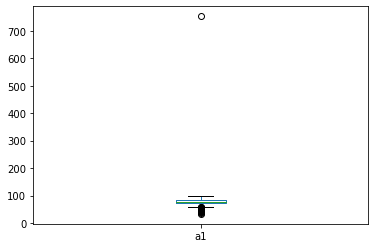

In [60]:
df.a1.plot(kind='box')